<a href="https://colab.research.google.com/github/tlcuzick/data-science-projects/blob/main/movie-reviews/movie_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from scipy.stats.stats import pearsonr
from scipy.stats import linregress
import matplotlib.pyplot as plt

movies = pd.read_csv('fandango_score_comparison.csv')

In [2]:
movies

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.30,3.30,3.55,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.00,3.35,3.75,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.50,3.20,4.05,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,1.10,2.35,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.40,1.45,1.70,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,4.0,4.0,4.35,3.90,3.35,3.95,3.70,4.5,4.0,3.5,4.0,3.5,33,7367,1348,0.0
142,'71 (2015),97,82,83,7.5,7.2,3.5,3.5,4.85,4.10,4.15,3.75,3.60,5.0,4.0,4.0,4.0,3.5,60,24116,192,0.0
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,3.5,3.5,4.85,3.90,4.45,4.40,3.70,5.0,4.0,4.5,4.5,3.5,123,24345,118,0.0
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,3.5,3.5,5.00,4.05,4.50,3.65,3.90,5.0,4.0,4.5,3.5,4.0,19,1955,59,0.0


In [3]:
%matplotlib inline

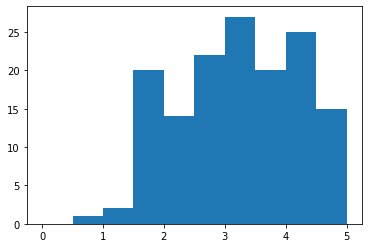

In [4]:
plt.hist(movies['Metacritic_norm_round'],range=[0,5])
plt.show()

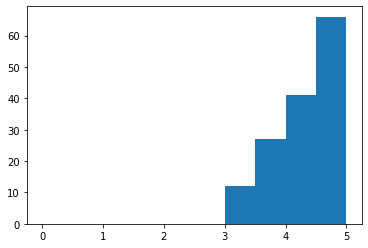

In [5]:
plt.hist(movies['Fandango_Stars'], range=[0,5])
plt.show()

When set to the same 0-5 scale, histograms of Metacritic reviews vs Fandango reviews clearly show a much wider distribution in the former, and a much narrower distribution concentrated towards higher reviews in the latter.

In [6]:
print('Fandango mean: {}'.format(movies['Fandango_Stars'].mean()))
print('Metacritic mean: {}'.format(movies['Metacritic_norm_round'].mean()))

Fandango mean: 4.089041095890411
Metacritic mean: 2.9726027397260273


In [7]:
print('Fandango median: {}'.format(movies['Fandango_Stars'].median()))
print('Metacritic median: {}'.format(movies['Metacritic_norm_round'].median()))

Fandango median: 4.0
Metacritic median: 3.0


In [8]:
print('Fandango standard deviation: {}'.format(np.std(movies['Fandango_Stars'])))
print('Metacritic standard deviation: {}'.format(np.std(movies['Metacritic_norm_round'])))

Fandango standard deviation: 0.5385321612699531
Metacritic standard deviation: 0.9875610297038636


* Metacritic's mean appears to be lower than its median due to a relatively small number of very low reviews skewing it downwards. Conversely, Fandango's mean appears to be higher than its median because of a concentration of movies with the highest possible rating of 5 stars.

* The standard deviation for Metacritic reviews is MUCH higher than that of Fandango reviews, indicating a generally wider variety of reviews from Metacritic reviewers. Based on the histograms, this variety mainly comes from lower reviews, which are pratically non-existent on Fandango.

* The mean ratings for Fandango are significantly higher than those for Metacritic across the same set of movies, indicating a structural/procedural difference in how the sites gather and aggregate reviews.

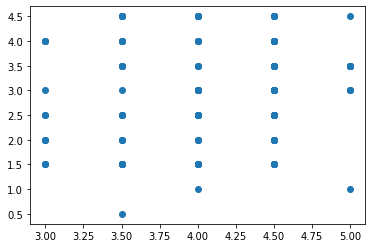

In [9]:
plt.scatter(movies['Fandango_Stars'],movies['Metacritic_norm_round'])
plt.show()

In [10]:
movies['fm_diff'] = movies['Metacritic_norm_round'] - movies['Fandango_Stars']
movies['fm_diff'] = np.absolute(movies['fm_diff'])
movies.sort_values('fm_diff',ascending=False,inplace=True)
print(movies.head(5))

                        FILM  RottenTomatoes  ...  Fandango_Difference  fm_diff
3     Do You Believe? (2015)              18  ...                  0.5      4.0
85         Little Boy (2015)              20  ...                  0.2      3.0
47              Annie (2014)              27  ...                  0.3      3.0
19             Pixels (2015)              17  ...                  0.4      3.0
134  The Longest Ride (2015)              31  ...                  0.0      3.0

[5 rows x 23 columns]


In [11]:
print('Correlation: {}'.format(pearsonr(movies['Fandango_Stars'], movies['Metacritic_norm_round'])[0]))

Correlation: 0.17844919073895918


The correlation between Metacritic and Fandango reviews for the same movies is very low. This could imply that their rating methodologies are simply very different, or that one (or both) methodologies is flawed or biased in some way.

In [12]:
slope, intercept, r_value, p_value, stderr_slope = linregress(movies['Metacritic_norm_round'],movies['Fandango_Stars'])

In [13]:
pred_3 = 3 * slope + intercept
print(pred_3)

4.091707152821204


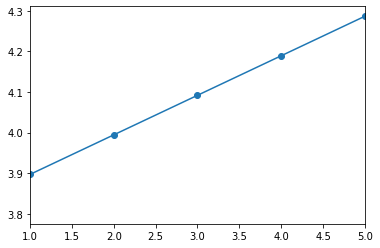

In [14]:
xvals = []
for n in range(0, 6):
    xvals.append(float(n))
    
yvals = []

for x in xvals:
    yvals.append(x * slope + intercept)

plt.scatter(xvals, yvals)
plt.plot(xvals, yvals)
plt.xlim(1,5)
plt.show()